# Test Delight on DESC-DC2 simulation  in the context of  Vera C. Rubin Obs (LSST) 


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 22 2022



- run at NERSC with **desc-python** python kernel.


Instruction to have a **desc-python** environnement:
- https://confluence.slac.stanford.edu/display/LSSTDESC/Getting+Started+with+Anaconda+Python+at+NERSC


This environnement is a clone from the **desc-python** environnement where package required in requirements can be addded according the instructions here
- https://github.com/LSSTDESC/desc-python/wiki/Add-Packages-to-the-desc-python-environment

We will use the parameter file "tmps/parametersTestRail.cfg".
This contains a description of the bands and data to be used.
In this example we will generate mock data for the ugrizy LSST bands,
fit each object with our GP using ugi bands only and see how it predicts the rz bands.
This is an example for filling in/predicting missing bands in a fully bayesian way
with a flexible SED model quickly via our photo-z GP.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys,os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

# Initialisation

In [2]:
workdir = "tmp"

# Configuration parameters

- now parameters are generated in a dictionnary

In [3]:
list_of_files = os.listdir(workdir)
list_of_files.remove('data') 
list_of_files.remove('delight_data') 
if '.ipynb_checkpoints' in list_of_files:
    list_of_files.remove('.ipynb_checkpoints')
list_of_configfiles = sorted(list_of_files)

In [4]:
list_of_configfiles

['parametersTest-Sens.cfg',
 'parametersTest-VC1e4_ell1e6.cfg',
 'parametersTest.cfg',
 'parametersTest_1.cfg',
 'parametersTest_10.cfg',
 'parametersTest_11.cfg',
 'parametersTest_12.cfg',
 'parametersTest_13.cfg',
 'parametersTest_14.cfg',
 'parametersTest_15.cfg',
 'parametersTest_16.cfg',
 'parametersTest_17.cfg',
 'parametersTest_18.cfg',
 'parametersTest_19.cfg',
 'parametersTest_2.cfg',
 'parametersTest_20.cfg',
 'parametersTest_21.cfg',
 'parametersTest_3.cfg',
 'parametersTest_4.cfg',
 'parametersTest_5.cfg',
 'parametersTest_6.cfg',
 'parametersTest_7.cfg',
 'parametersTest_8.cfg',
 'parametersTest_9.cfg']

# Filters

- First, we must **fit the band filters with a gaussian mixture**. 
This is done with this script:

In [5]:
from delight.interfaces.rail.processFilters import processFilters

In [6]:
#configfilename = list_of_configfiles[9]
configfilename = 'parametersTest-Sens.cfg'
configfullfilename = os.path.join(workdir,configfilename) 
processFilters(configfullfilename)

2022-02-09 13:12:07,117 ipykernel_launcher.py delight.interfaces.rail.processFilters[5863] INFO ----- processFilters ------
2022-02-09 13:12:07,122 ipykernel_launcher.py delight.interfaces.rail.processFilters[5863] INFO parameter file is tmp/parametersTest-Sens.cfg


DC2LSST_u DC2LSST_g DC2LSST_r DC2LSST_i DC2LSST_z DC2LSST_y 

# SED

- Second, we will process the library of SEDs and project them onto the filters,
(for the mean fct of the GP) with the following script (which may take a few minutes depending on the settings you set):

In [7]:
from delight.interfaces.rail.processSEDs import processSEDs

In [8]:
#configfilename = list_of_configfiles[9]
configfilename = 'parametersTest-Sens.cfg'
configfullfilename = os.path.join(workdir,configfilename) 
processSEDs(configfullfilename)

2022-02-09 13:13:04,148 ipykernel_launcher.py, delight.interfaces.rail.processSEDs[5863] INFO --- Process SED ---


# Train and apply
Run the scripts below. There should be a little bit of feedback as it is going through the lines.
For up to 1e4 objects it should only take a few minutes max, depending on the settings above.

## Template Fitting

In [9]:
from delight.interfaces.rail.templateFitting import templateFitting

In [10]:
templateFitting(configfullfilename)

2022-02-09 13:13:30,649 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO --- TEMPLATE FITTING ---
2022-02-09 13:13:30,651 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO ==> New Prior calculation from Benitez
2022-02-09 13:13:30,656 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO Thread number / number of threads: 1 , 1
2022-02-09 13:13:30,659 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO Input parameter file:tmp/parametersTest-Sens.cfg
2022-02-09 13:13:30,706 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO Number of Target Objects 420
2022-02-09 13:13:30,708 ipykernel_launcher.py, delight.interfaces.rail.templateFitting[5863] INFO Thread 0 , analyzes lines 0 , to 420


## Gaussian Process

### Attempt at cross-examination of V_C and ellSigmaPrior influence

2022-02-09 13:13:46,026 ipykernel_launcher.py, delightLearn_paramSpec[5863] INFO --- DELIGHT-LEARN ---
2022-02-09 13:13:46,087 ipykernel_launcher.py, delightLearn_paramSpec[5863] INFO Number of Training Objects 3755
2022-02-09 13:13:46,089 ipykernel_launcher.py, delightLearn_paramSpec[5863] INFO Thread 0 , analyzes lines 0 , to 3755


Creation of GP with V_C = 1.0, V_L = 0.1, alpha_C = 1000.0, alpha_L = 100.0.


2022-02-09 13:15:23,305 ipykernel_launcher.py, delightApply_paramSpecPlot[5863] INFO --- DELIGHT-APPLY ---
2022-02-09 13:15:23,398 ipykernel_launcher.py, delightApply_paramSpecPlot[5863] INFO Number of Training Objects 3755
2022-02-09 13:15:23,400 ipykernel_launcher.py, delightApply_paramSpecPlot[5863] INFO Number of Target Objects 420
2022-02-09 13:15:23,404 ipykernel_launcher.py, delightApply_paramSpecPlot[5863] INFO Thread 0 , analyzes lines 0 to 420


Creation of GP with V_C = 1.0, V_L = 0.1, alpha_C = 1000.0, alpha_L = 100.0.


/home/photoz/Intern2022_PhotoZ/Delight/desc-dc2/delightApply_paramSpecPlot.py:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figMeanCov, axMeanCov = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)


Study of the influence of ellPriorSigma on likelihood and evidences
Computation of likelihood and evidences for ellPriorSigma = 1.0
0 0.5731930732727051 0.042237043380737305 0.030475616455078125
100 0.5166370868682861 0.02368760108947754 0.047594308853149414
200 0.4737575054168701 0.025034666061401367 0.05687689781188965
300 0.4291207790374756 0.02294301986694336 0.04467272758483887
400 0.43012142181396484 0.03303384780883789 0.027310609817504883
Computation of likelihood and evidences for ellPriorSigma = 1000000.0
0 0.37795472145080566 0.02277517318725586 0.02707505226135254
100 0.4647994041442871 0.032536983489990234 0.06322860717773438
200 0.3633384704589844 0.028544187545776367 0.06888008117675781
300 0.4408230781555176 0.028481245040893555 0.0525054931640625
400 0.4230918884277344 0.022499561309814453 0.027042865753173828


/home/photoz/Intern2022_PhotoZ/Delight/desc-dc2/delightApply_paramSpecPlot.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


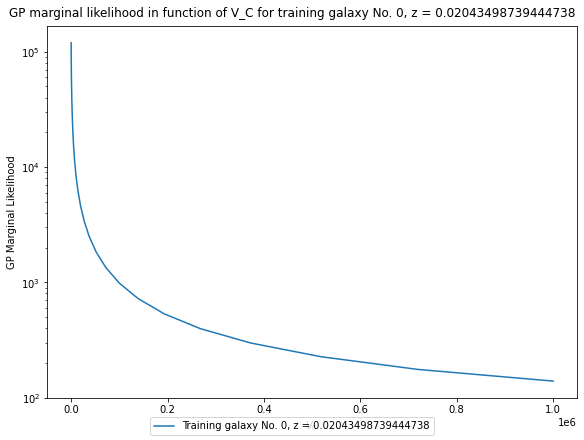

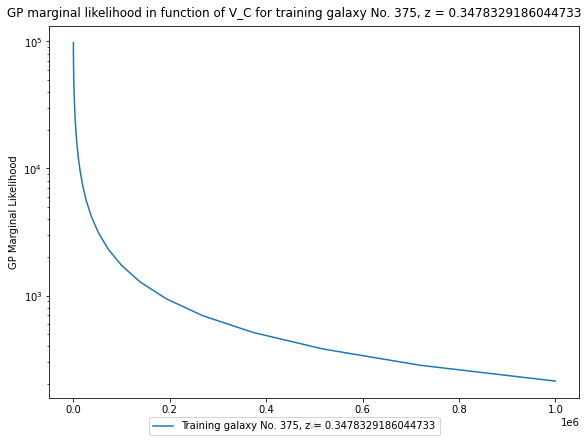

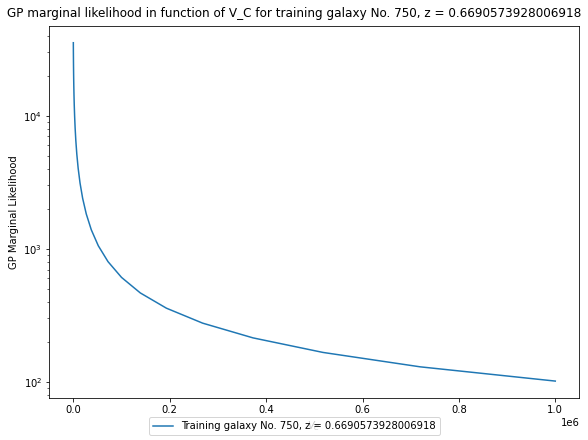

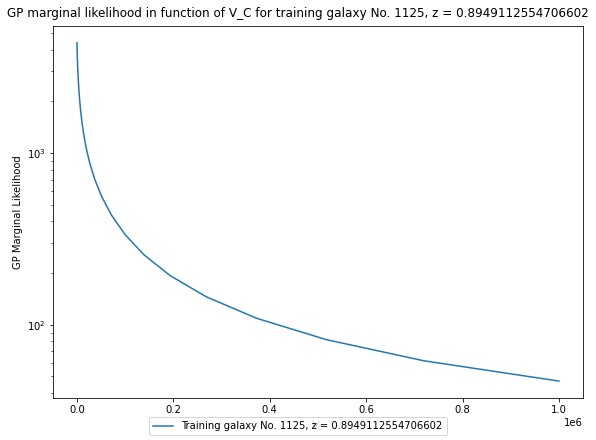

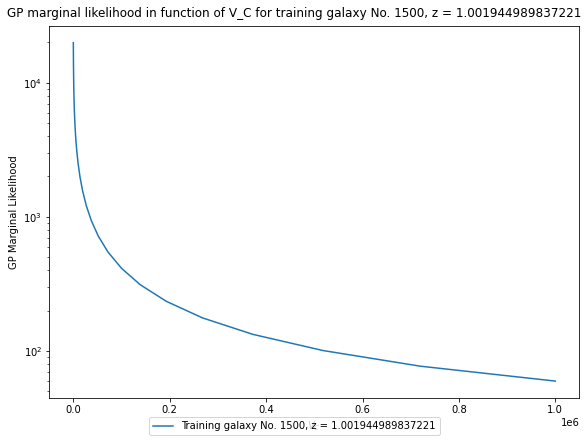

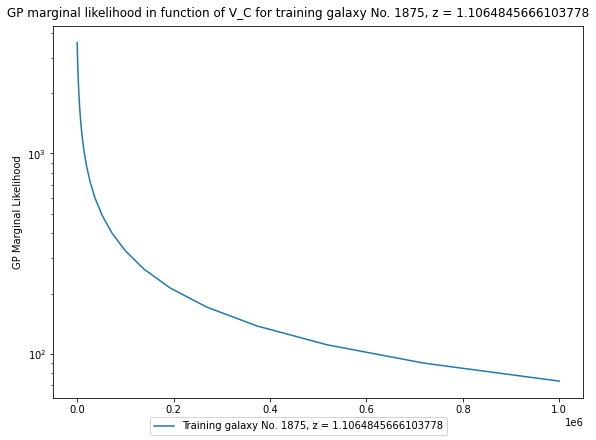

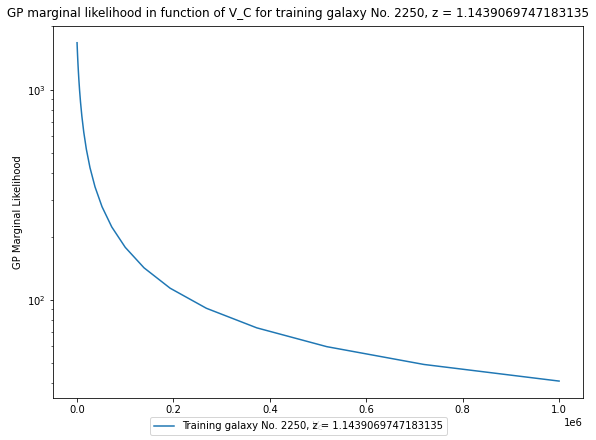

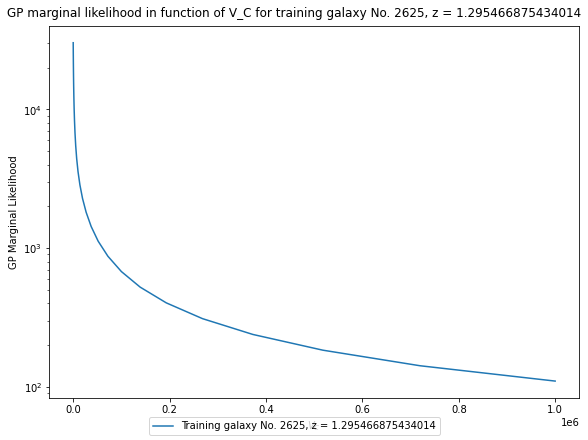

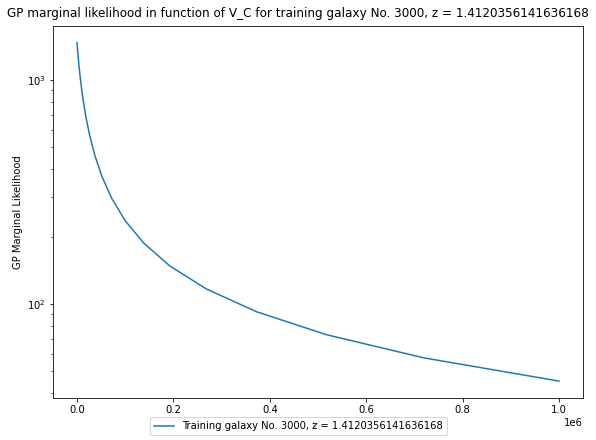

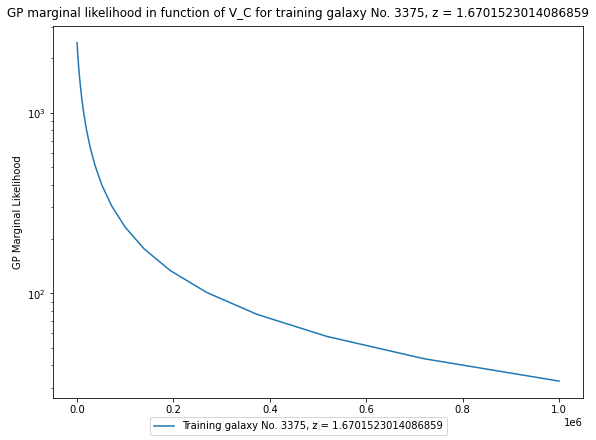

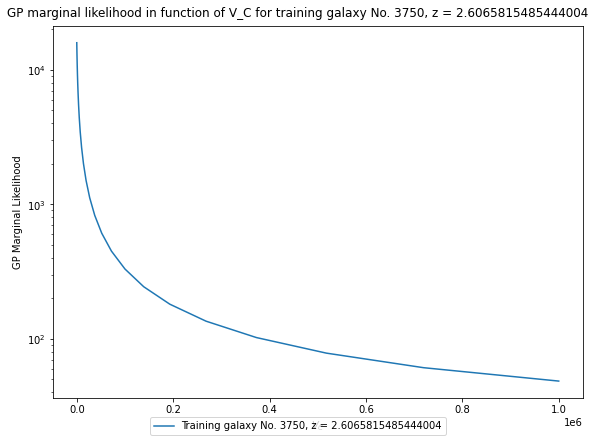

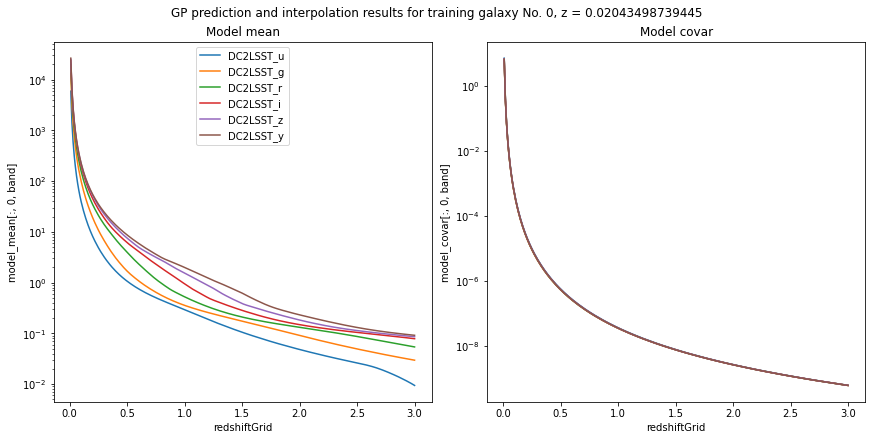

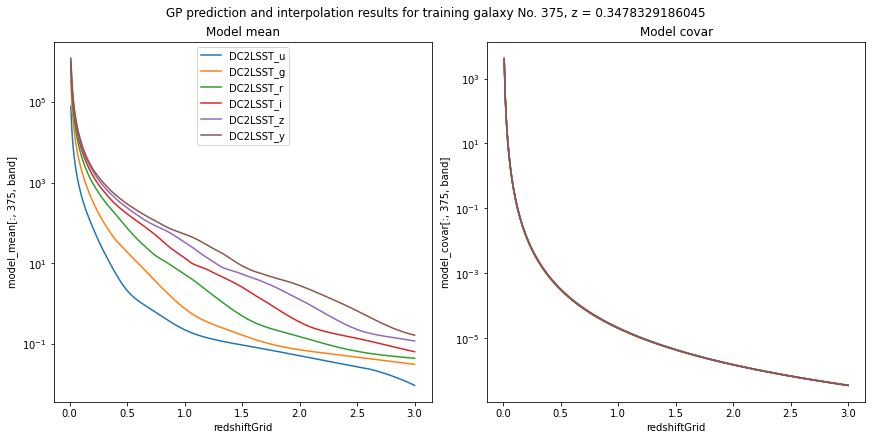

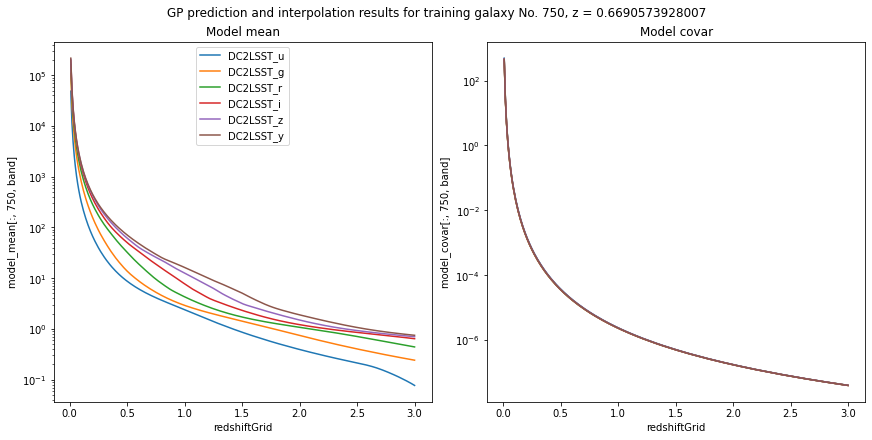

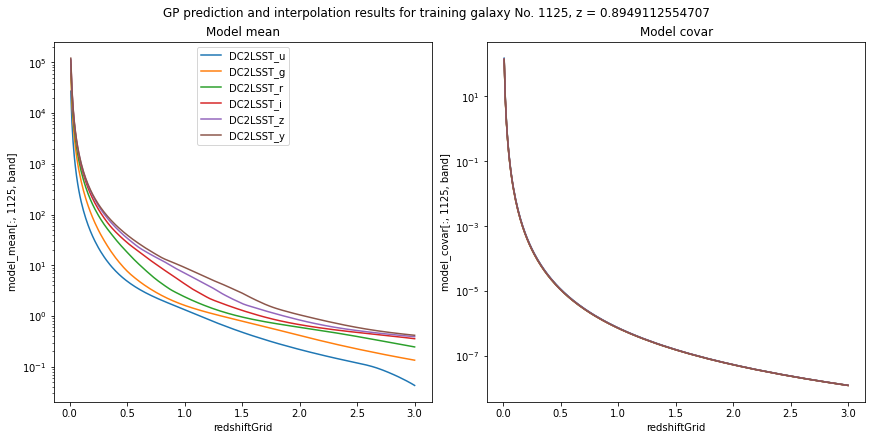

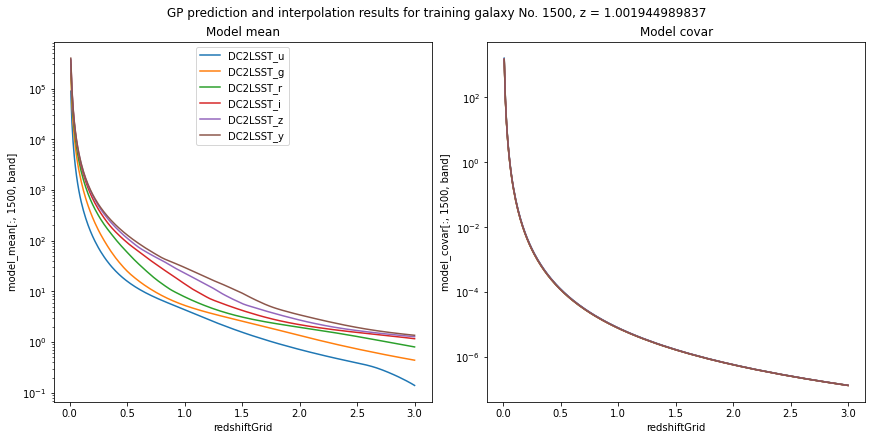

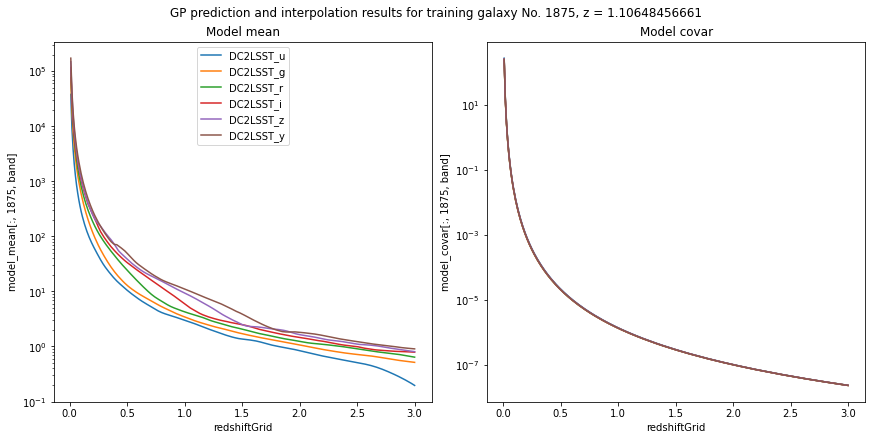

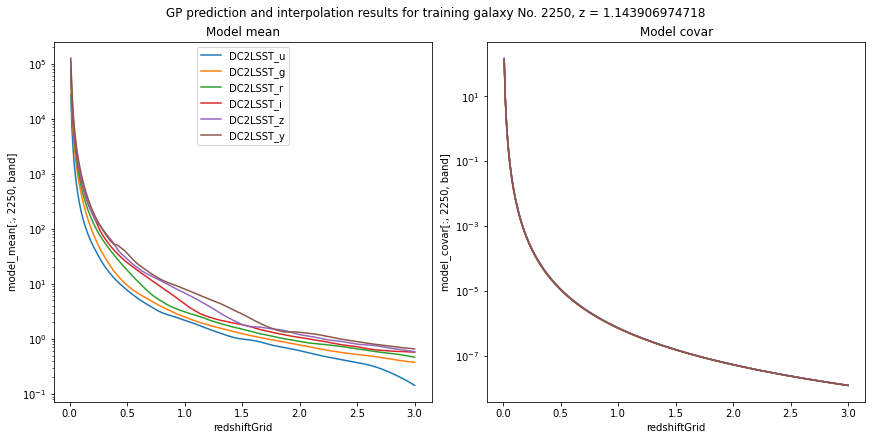

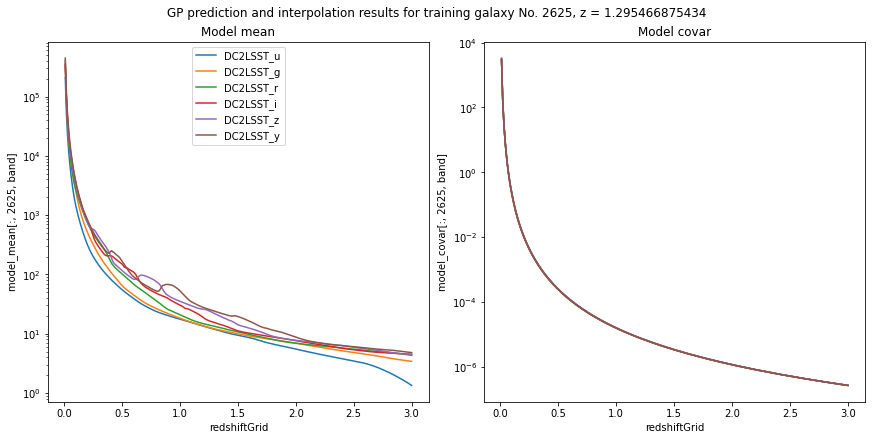

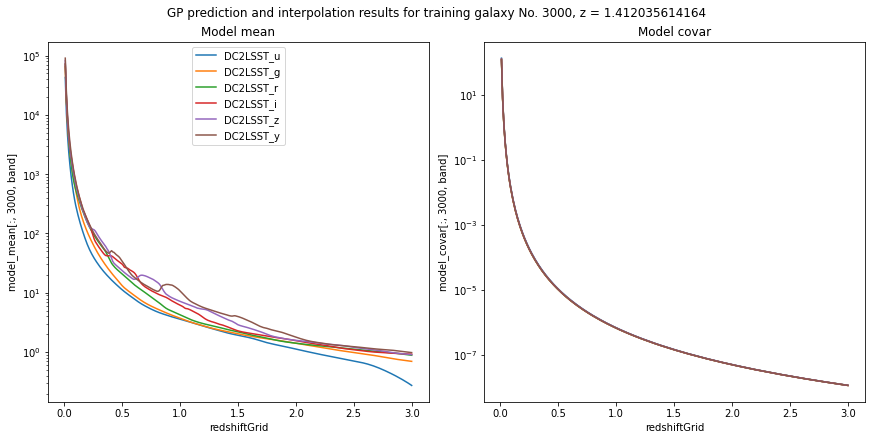

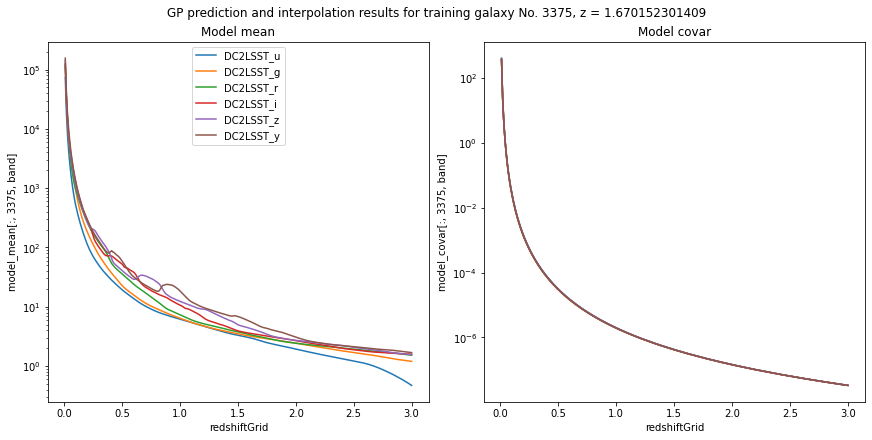

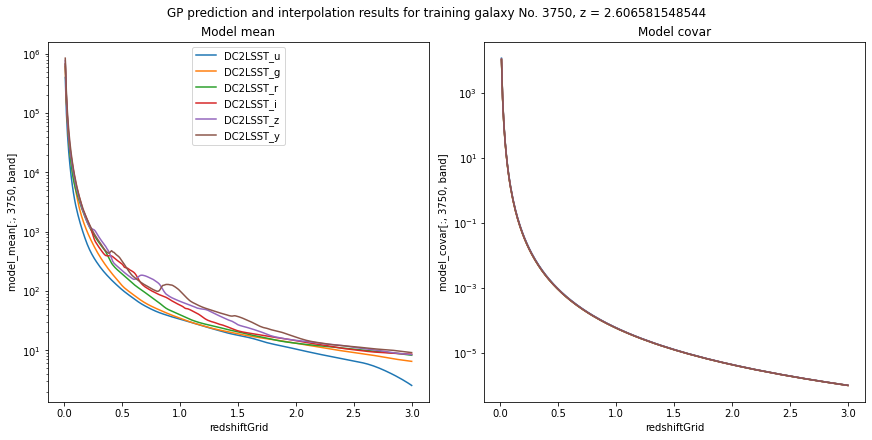

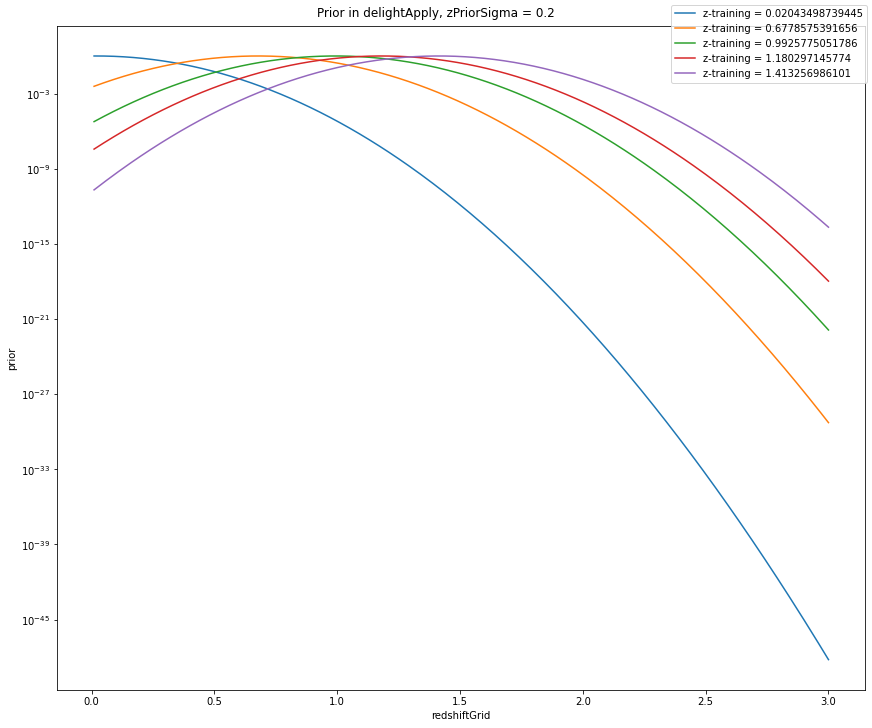

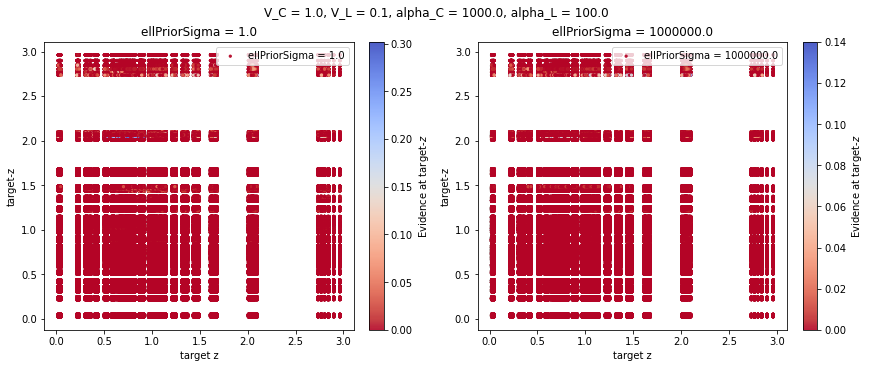

In [11]:
from delightLearn_paramSpec import delightLearn_paramSpec
from delightApply_paramSpecPlot import delightApply_paramSpecPlot
for paramVal in [1.0]:
    delightLearn_paramSpec(configfullfilename, V_C=paramVal)
    delightApply_paramSpecPlot(configfullfilename, V_C=paramVal, sensitivity=True, ellPriorSigma_list=[1.0, 1e6])

# Analyze the outputs

In [12]:
# First read a bunch of useful stuff from the parameter file.
params = parseParamFile(configfullfilename, verbose=False)
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms\
    = readBandCoefficients(params)
bandNames = params['bandNames']
numBands, numCoefs = bandCoefAmplitudes.shape
fluxredshifts = np.loadtxt(params['target_catFile'])
fluxredshifts_train = np.loadtxt(params['training_catFile'])
bandIndices, bandNames, bandColumns, bandVarColumns, redshiftColumn,\
            refBandColumn = readColumnPositions(params, prefix='target_')
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
nt = len(sed_names)
f_mod = np.zeros((redshiftGrid.size, nt, len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')

In [13]:
# Load the PDF files
metrics = np.loadtxt(params['metricsFile'])
metricscww = np.loadtxt(params['metricsFileTemp'])
# Those of the indices of the true, mean, stdev, map, and map_std redshifts.
i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
i_ze = i_zm
i_std_ze = i_std_zm

pdfs = np.loadtxt(params['redshiftpdfFile'])
pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
nobj = pdfatZ.size
#pdfs /= pdfs.max(axis=1)[:, None]
#pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]

269 172 178 258 175 32 308 221 285 14 177 377 327 263 218 62 89 375 230 225 

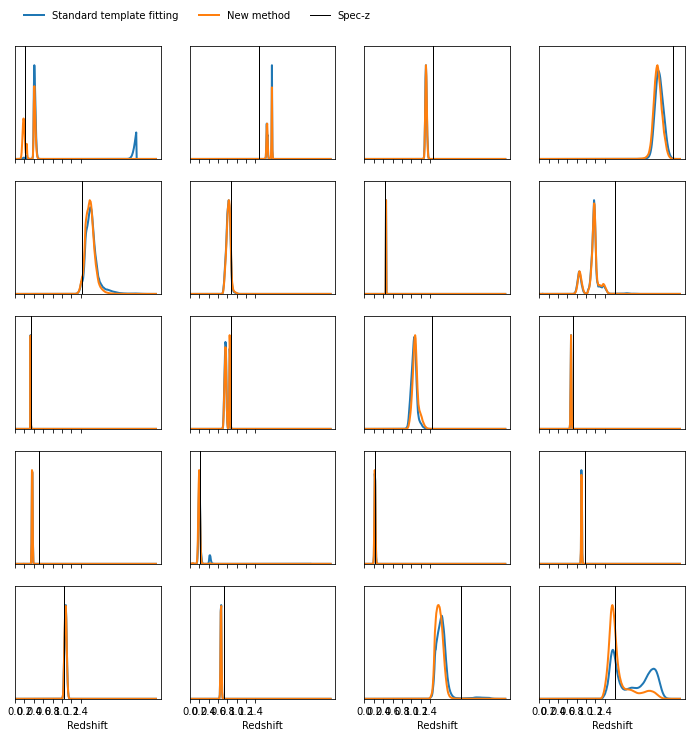

In [14]:
ncol = 4
fig, axs = plt.subplots(5, ncol, figsize=(12, 12), sharex=True, sharey=False)
axs = axs.ravel()
z = fluxredshifts[:, redshiftColumn]
sel = np.random.choice(nobj, axs.size, replace=False)
lw = 2
for ik in range(axs.size):
    k = sel[ik]
    print(k, end=" ")
    axs[ik].plot(redshiftGrid, pdfs_cww[k, :],lw=lw, label='Standard template fitting')# c="#2ecc71", 
    axs[ik].plot(redshiftGrid, pdfs[k, :], lw=lw, label='New method')  #, c="#3498db"
    axs[ik].axvline(fluxredshifts[k, redshiftColumn], c="k", lw=1, label='Spec-z')
    ymax = np.max(np.concatenate((pdfs[k, :], pdfs_cww[k, :])))
    axs[ik].set_ylim([0, ymax*1.2])
    axs[ik].set_xlim([0, 3.1])
    axs[ik].set_yticks([])
    axs[ik].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
for i in range(ncol):
    axs[-i-1].set_xlabel('Redshift', fontsize=10)
axs[0].legend(ncol=3, frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.4))
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.96)


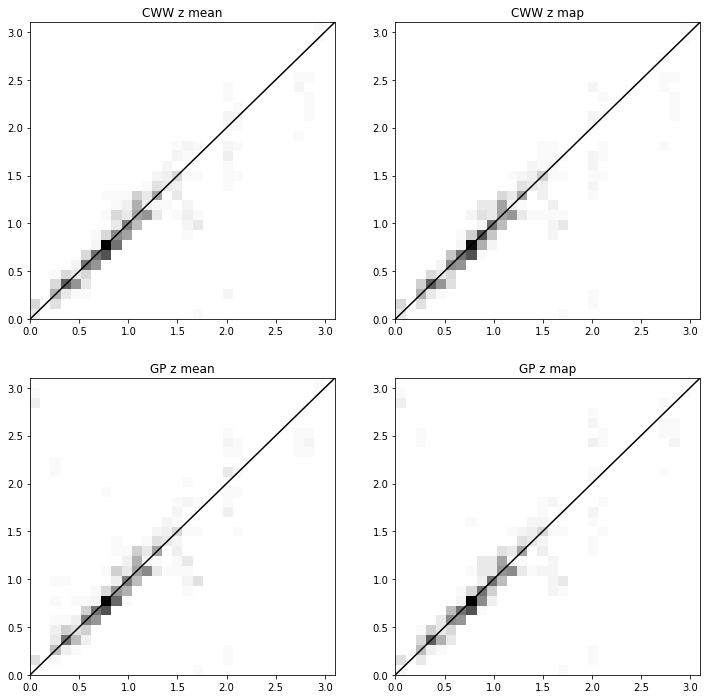

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
zmax = 3.1
rr = [[0, zmax], [0, zmax]]
nbins = 30
h = axs[0, 0].hist2d(metricscww[:, i_zt], metricscww[:, i_zm], nbins, cmap='Greys', range=rr)
hmin, hmax = np.min(h[0]), np.max(h[0])
axs[0, 0].set_title('CWW z mean')
axs[0, 1].hist2d(metricscww[:, i_zt], metricscww[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[0, 1].set_title('CWW z map')
axs[1, 0].hist2d(metrics[:, i_zt], metrics[:, i_zm], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 0].set_title('GP z mean')
axs[1, 1].hist2d(metrics[:, i_zt], metrics[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 1].set_title('GP z map')
axs[0, 0].plot([0, zmax], [0, zmax], c='k')
axs[0, 1].plot([0, zmax], [0, zmax], c='k')
axs[1, 0].plot([0, zmax], [0, zmax], c='k')
axs[1, 1].plot([0, zmax], [0, zmax], c='k')
#fig.tight_layout()

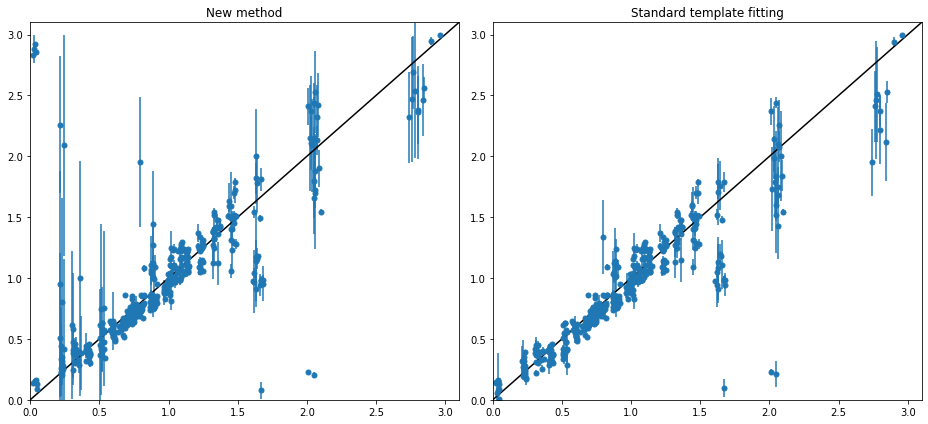

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
chi2s = ((metrics[:, i_zt] - metrics[:, i_ze])/metrics[:, i_std_ze])**2

axs[0].errorbar(metrics[:, i_zt], metrics[:, i_ze], yerr=metrics[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[1].errorbar(metricscww[:, i_zt], metricscww[:, i_ze], yerr=metricscww[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[0].plot([0, zmax], [0, zmax], 'k')
axs[1].plot([0, zmax], [0, zmax], 'k')
axs[0].set_xlim([0, zmax])
axs[1].set_xlim([0, zmax])
axs[0].set_ylim([0, zmax])
axs[1].set_ylim([0, zmax])
axs[0].set_title('New method')
axs[1].set_title('Standard template fitting')

fig.tight_layout()

Text(0.5, 1.0, 'New method')

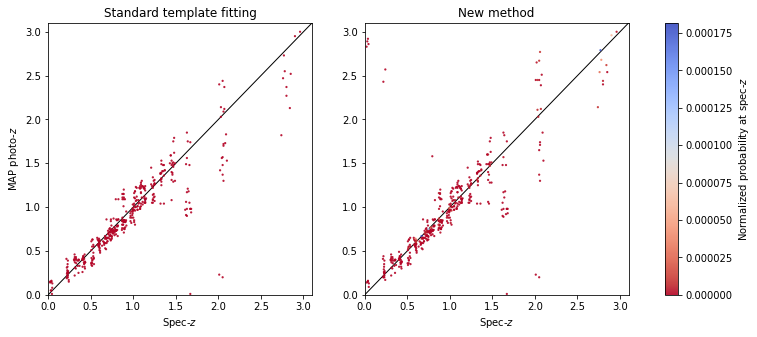

In [17]:
cmap = "coolwarm_r"
vmin = 0.0
alpha = 0.9
s = 5
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
vs = axs[0].scatter(metricscww[:, i_zt], metricscww[:, i_zmap], 
                    s=s, c=pdfatZ_cww, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
vs = axs[1].scatter(metrics[:, i_zt], metrics[:, i_zmap], 
                    s=s, c=pdfatZ, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
clb = plt.colorbar(vs, ax=axs.ravel().tolist())
clb.set_label('Normalized probability at spec-$z$')
for i in range(2):
    axs[i].plot([0, zmax], [0, zmax], c='k', lw=1, zorder=0, alpha=1)
    axs[i].set_ylim([0, zmax])
    axs[i].set_xlim([0, zmax])
    axs[i].set_xlabel('Spec-$z$')
axs[0].set_ylabel('MAP photo-$z$')

axs[0].set_title('Standard template fitting')
axs[1].set_title('New method')

## Conclusion
Don't be too harsh with the results of the standard template fitting or the new methods since both have a lot of parameters which can be optimized!

If the results above made sense, i.e. the redshifts are reasonnable for both methods on the mock data, then you can start modifying the parameter files and creating catalog files containing actual data! I recommend using less than 20k galaxies for training, and 1000 or 10k galaxies for the delight-apply script at the moment. Future updates will address this issue.